In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks', color_codes=True)

from tqdm import tqdm
tqdm.pandas()

%matplotlib inline

/projects/rlmolecule/pstjohn/envs/tf2_gpu/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
redf = pd.read_csv('/projects/rlmolecule/pstjohn/atom_spins/redf_spins.csv.gz')
cdf = pd.read_csv('/projects/rlmolecule/pstjohn/atom_spins/cdf_spins.csv.gz')

In [4]:
cdf.head()

,smiles,atom_type,atom_index,spin
0,[Br],Br,0,1.000000
1,BrC12C3C4[C]5C3C1C5C42,Br,0,0.013204
2,BrC12C3C4[C]5C3C1C5C42,C,1,-0.014127
3,BrC12C3C4[C]5C3C1C5C42,C,2,0.076213
4,BrC12C3C4[C]5C3C1C5C42,C,3,-0.102171


In [5]:
# Total number of gas-phase spins
cdf.shape

(8176197, 4)

In [6]:
redf['fractional_spin'] = redf.groupby('smiles').spin.apply(lambda x: x.abs() / x.abs().sum())
# cdf['fractional_spin'] = cdf.groupby('smiles').spin.apply(lambda x: x.abs() / x.abs().sum())

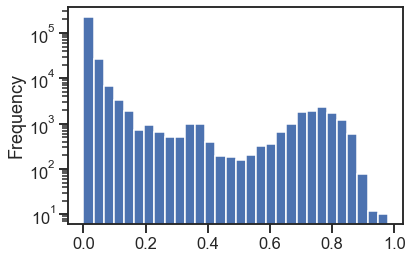

In [7]:
redf['fractional_spin'].plot.hist(bins=30)
plt.yscale('log')

In [66]:
import psycopg2

dbparams = {
    'dbname': 'bde',
    'port': 5432,
    'host': 'yuma.hpc.nrel.gov',
    'user': 'redoxops',
    'password': 'R3d0x!',
    'options': f'-c search_path=redox,bde'
}

with psycopg2.connect(**dbparams) as conn:
    buried_volumes = pd.read_sql_query("""
    SELECT * from redoxcompoundcopy_all_atoms where bur_vol is not NULL;
    """, conn)

In [67]:
buried_volumes = buried_volumes.drop_duplicates(subset=['smiles', 'atom_id'])
buried_volumes['atom_id'] = buried_volumes['atom_id'] - 1  # Something to remember; shree's indexing her atoms from 1

In [68]:
buried_volumes

,id,cid,smiles,logfile,atom_sym,atom_id,atom_sym_id,mull_charge,spin_density,bur_vol
0,1,820,C=[C]C,/projects/rlmolecule/pstjohn/redox_calculation...,C,0,C1,-0.410670,-0.154865,24.328617
4,1,820,C=[C]C,/projects/rlmolecule/pstjohn/redox_calculation...,C,1,C2,-0.010124,0.995103,27.919655
8,1,820,C=[C]C,/projects/rlmolecule/pstjohn/redox_calculation...,C,2,C3,-0.435531,-0.024888,24.661715
12,4,525151,C[S+]C,/projects/rlmolecule/pstjohn/redox_calculation...,C,0,C1,-0.421570,-0.028532,28.624364
16,4,525151,C[S+]C,/projects/rlmolecule/pstjohn/redox_calculation...,S,1,S2,0.448108,0.904697,32.659826
...,...,...,...,...,...,...,...,...,...,...
196438,44887,913055,[c]1scc2c1OCCCO2,/projects/rlmolecule/svss/Project-Redox/gaussi...,O,5,O6,-0.359027,0.003028,44.345105
196442,44887,913055,[c]1scc2c1OCCCO2,/projects/rlmolecule/svss/Project-Redox/gaussi...,C,6,C7,-0.144822,-0.000673,40.819055
196446,44887,913055,[c]1scc2c1OCCCO2,/projects/rlmolecule/svss/Project-Redox/gaussi...,C,7,C8,-0.258243,0.000840,39.742623
196450,44887,913055,[c]1scc2c1OCCCO2,/projects/rlmolecule/svss/Project-Redox/gaussi...,C,8,C9,-0.146214,-0.000854,40.913471


In [69]:
merged = buried_volumes.merge(redf, left_on=['smiles', 'atom_id'], right_on=['smiles', 'atom_index'], how='left')
merged = merged.dropna()
merged['atom_index'] = merged['atom_index'].astype(int)

In [70]:
merged[['smiles', 'atom_type', 'atom_index', 'bur_vol']].to_csv('/projects/rlmolecule/pstjohn/atom_spins/redf_buried_volume.csv.gz', compression='gzip', index=False)

In [80]:
len(redf.smiles.unique())

14599

In [81]:
redf = redf_spin.merge(redf_bv, on=['smiles', 'atom_index', 'atom_type'], how='left')

In [82]:
for smiles, idf in tqdm(redf.groupby('smiles')):
    input_dict = preprocessor.construct_feature_matrices(smiles, train=train)
    spin = idf.set_index('atom_index').sort_index().spin
    fractional_spin = spin.abs() / spin.abs().sum()
    input_dict['spin'] = fractional_spin.values
    break

  0%|          | 0/14599 [00:01<?, ?it/s]


NameError: name 'preprocessor' is not defined

In [85]:
idf.bur_vol.values

array([27.5506119 , 40.60638847, 51.73196462, 35.91999521, 57.65526653,
       41.53958628, 50.91490544, 38.62808771, 37.46743364,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan])

In [1]:
pd

NameError: name 'pd' is not defined